In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
def rename_metrics(df):
    df['metric'] = df['metric'].map({"correlation":"$CE_{av}$",
                     "nrmse dc": "$NRMSE_{av}$",
                     "rae dc": "$REE_{av}$"})
    return df

In [61]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/data/long_term_method_comparison/long_term_method_comparison_wards.csv")
results = rename_metrics(results)
results

,metric,value,year,method,n_clusters
0,$CE_{av}$,0.088614,2012,medoids,2
1,$NRMSE_{av}$,6.291099,2012,medoids,2
2,$REE_{av}$,4.972923,2012,medoids,2
3,$CE_{av}$,0.091604,2013,medoids,2
4,$NRMSE_{av}$,6.794750,2013,medoids,2
...,...,...,...,...,...
3145,$NRMSE_{av}$,23.785163,2015,wards,61
3146,$REE_{av}$,60.681420,2015,wards,61
3147,$CE_{av}$,0.127677,2016,wards,61
3148,$NRMSE_{av}$,22.289265,2016,wards,61


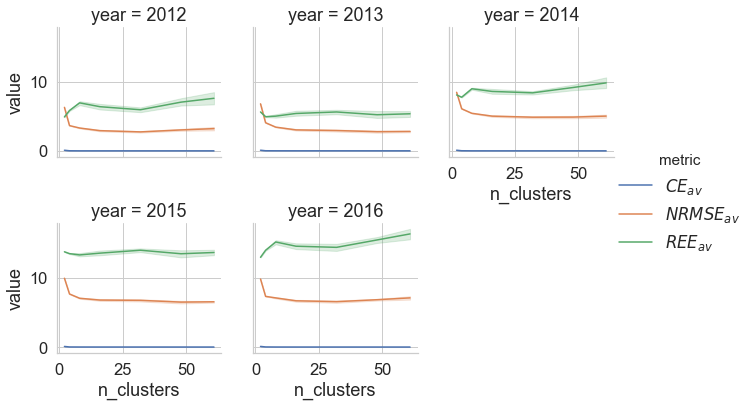

In [62]:
g = sns.FacetGrid(data=results[results.method=="medoids"], col="year", hue="metric", col_wrap=3, margin_titles=True, legend_out=True)
g.map(sns.lineplot, "n_clusters", 'value')
g.add_legend()
# g = g.map(sns.lineplot, x="n_clusters", y="value", hue="metric", marker=".")
    

In [63]:
results.head()

,metric,value,year,method,n_clusters
0,$CE_{av}$,0.088614,2012,medoids,2
1,$NRMSE_{av}$,6.291099,2012,medoids,2
2,$REE_{av}$,4.972923,2012,medoids,2
3,$CE_{av}$,0.091604,2013,medoids,2
4,$NRMSE_{av}$,6.794750,2013,medoids,2


In [64]:
mean_error_results = results.groupby(['metric','n_clusters','method']).value.mean()
mean_error_results = pd.DataFrame(mean_error_results)
mean_error_results.reset_index(inplace=True)
mean_error_results

,metric,n_clusters,method,value
0,$CE_{av}$,2,centroids,0.068496
1,$CE_{av}$,2,medoids,0.095105
2,$CE_{av}$,2,wards,0.102186
3,$CE_{av}$,4,centroids,0.017925
4,$CE_{av}$,4,medoids,0.020786
...,...,...,...,...
58,$REE_{av}$,48,medoids,10.068347
59,$REE_{av}$,48,wards,52.977931
60,$REE_{av}$,61,centroids,10.155223
61,$REE_{av}$,61,medoids,10.549987


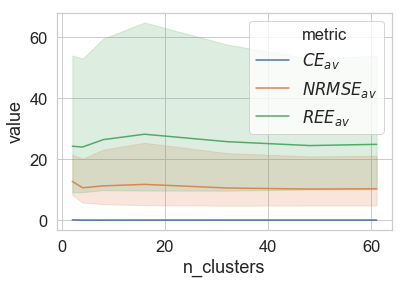

In [65]:
sns.lineplot(data=mean_error_results, x="n_clusters", y="value", hue='metric')

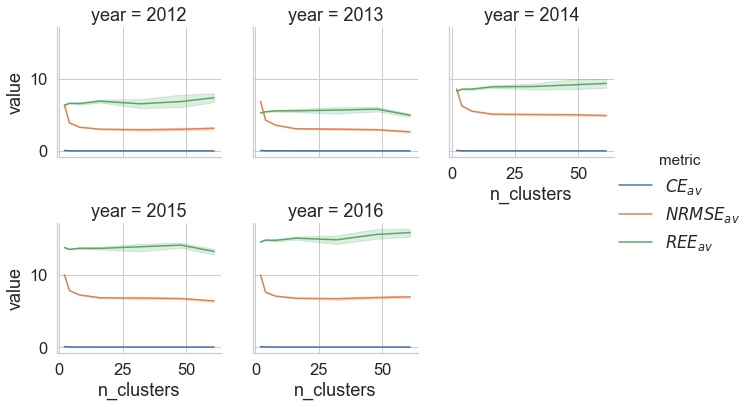

In [66]:
g = sns.FacetGrid(data=results[results.method=="centroids"], col="year", hue="metric", col_wrap=3, margin_titles=True, legend_out=True)
g.map(sns.lineplot, "n_clusters", 'value')
g.add_legend()

In [67]:
original_year = results[results.year==2012]
original_year['method'] = original_year['method']+"_original"
original_year.head()
# mean_error_results.head()

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,metric,value,year,method,n_clusters
0,$CE_{av}$,0.088614,2012,medoids_original,2
1,$NRMSE_{av}$,6.291099,2012,medoids_original,2
2,$REE_{av}$,4.972923,2012,medoids_original,2
15,$CE_{av}$,0.013366,2012,medoids_original,4
16,$NRMSE_{av}$,3.633750,2012,medoids_original,4


In [68]:
mean_error_results = mean_error_results.append(original_year.drop(columns="year"))


In [69]:
mean_error_results

,method,metric,n_clusters,value
0,centroids,$CE_{av}$,2,0.068496
1,medoids,$CE_{av}$,2,0.095105
2,wards,$CE_{av}$,2,0.102186
3,centroids,$CE_{av}$,4,0.017925
4,medoids,$CE_{av}$,4,0.020786
...,...,...,...,...
3121,wards_original,$NRMSE_{av}$,48,18.110332
3122,wards_original,$REE_{av}$,48,45.842072
3135,wards_original,$CE_{av}$,61,0.112423
3136,wards_original,$NRMSE_{av}$,61,18.011631


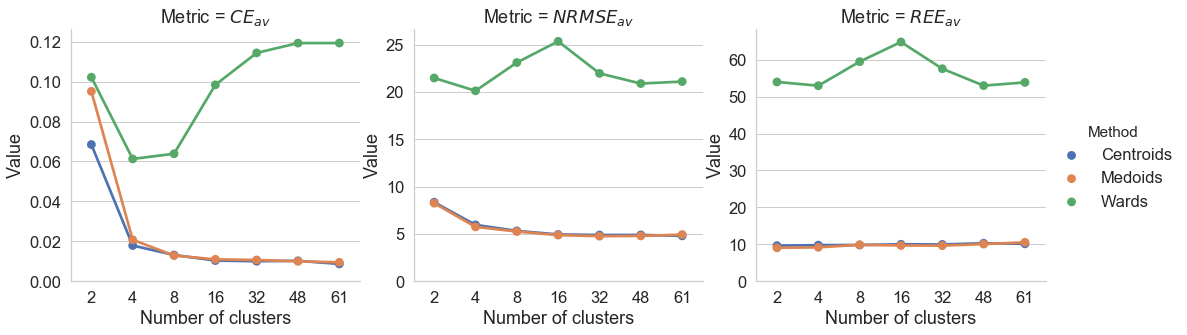

In [70]:
mean_error_results = mean_error_results.rename(columns={"metric":"Metric", "method":"Method"})
mean_error_results['Method'] = mean_error_results['Method'].map({'centroids':'Centroids', 'medoids':"Medoids", "wards":"Wards"})
mean_error_results.to_csv('/Users/alexanderkell/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/data/long_term_method_comparison/long_term_method_comparison_cleaned_wards.csv')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
# sns.set_palette(sns.color_palette("Paired"))
g = sns.catplot(data=mean_error_results, kind="point", x="n_clusters", y="value", hue="Method", col="Metric", sharey=False)
g.set(ylim=(0))
g.set(xlabel='Number of clusters', ylabel='Value')
g.savefig('/Users/alexanderkell/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/figures/clusters_compared_wards.pdf')


In [71]:
results_half = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/data/long_term_method_comparison/long_term_method_comparison_half_years.csv')
results_half = rename_metrics(results_half)
results_half['method'] = results_half['method'] + "_half"
mean_results_with_half = mean_error_results.append(results_half)
mean_results_with_half

FileNotFoundError: [Errno 2] File b'/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/data/long_term_method_comparison/long_term_method_comparison_half_years.csv' does not exist: b'/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity/reports/data/long_term_method_comparison/long_term_method_comparison_half_years.csv'

In [ ]:
g = sns.catplot(data=mean_results_with_half, kind="point", x="n_clusters", y="value", hue="method", col="metric", sharey=False)
g.set(ylim=(0))
g.set(xlabel='Number of clusters', ylabel='Value')
